## Imports

In [234]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, stochastic_gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(stochastic_gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from stochastic_gradient_descent import sgd_ols, sgd_momentum_ols, sgd_ADAGrad_ols, sgd_RMSProp_ols, sgd_ADAM_ols, \
    sgd_Ridge, sgd_momentum_Ridge, sgd_ADAGrad_Ridge, sgd_RMSProp_Ridge, sgd_ADAM_Ridge
from OLS import OLS_parameters
from Ridge import Ridge_parameters

## Testing functions, OLS

### Stochastic GD, OLS, fixed learning rate

In [168]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 3

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ols(X_train_s, y_train, eta=1e-2, n_epochs=1000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


### Man får litt noise, men det er kanskje å forvente

GD parameters:  [-0.04568633 -0.21115698  0.05662551]
Number of iterations: 8000
Closed-form OLS coefficients:  [-0.05954315 -0.21511095  0.04247308]
GD parameters equal to closed-form parameters: [False  True False].
Tolerance = 0.01


### SGD With momentum, OLS

In [169]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 15
mom = 0.7

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_momentum_ols(X_train_s, y_train, eta=1e-3, momentum=mom, n_epochs=1000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")



GD parameters:  [-0.02218849 -0.59784526  0.03667215  0.21194704  0.02598336  0.23732364
  0.00575593  0.12884887 -0.00718066  0.01650412 -0.0118724  -0.07503635
 -0.01033489 -0.14473443 -0.00461476]
Number of iterations: 8000
Closed-form OLS coefficients:  [-7.39810107e-03 -4.42607177e+00  2.54622412e-01  3.14599434e+01
 -1.99339100e+00 -1.17567355e+02  6.31988233e+00  2.46608659e+02
 -8.82958942e+00 -2.91114084e+02  4.07606976e+00  1.80437321e+02
  1.68729036e+00 -4.56559553e+01 -1.51398015e+00]
GD parameters equal to closed-form parameters: [False False False False False False False False False False False False
 False False False].
Tolerance = 0.01


### SGD with ADAGrad, OLS

In [170]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAGrad_ols(X_train_s, y_train, eta=1e-1, n_epochs=1000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.0230541  -0.72959253  0.06706754  0.54182951  0.01242307  0.26719771
 -0.03233037 -0.28969253]
Number of iterations: 8000
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [ True False False False False False False False].
Tolerance = 0.01


### SGD with RMSProp, OLS

In [171]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 4

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_RMSProp_ols(X_train_s, y_train, eta=1e-1, n_epochs=1000, M=10)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [ 0.00374371 -0.70888852  0.12137233  0.36871752]
Number of iterations: 8000
Closed-form OLS coefficients:  [-0.02249711 -0.70195862  0.02683544  0.50740635]
GD parameters equal to closed-form parameters: [ True  True  True  True].
Tolerance = 0.1


### SGD with ADAM, OLS

In [172]:
# Test gradient descent method, OLS:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAM_ols(X_train_s, y_train, eta=1e-2, n_epochs=1000, M=40)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02279039 -1.01232175  0.0817853   1.06629443  0.00354638  0.21000581
 -0.0387411  -0.50836704]
Number of iterations: 2000
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [ True False False False False False False False].
Tolerance = 0.1


### Computing parameters with SGD, OLS

In [173]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables:
deg_max = 15
eta = 1e-2
n_epochs = 1000

# Lists for MSEs
MSE_closed_form_OLS = []
MSE_gd_fixed_learning_rate_OLS = []
MSE_gd_momentum_OLS = []
MSE_gd_ADAGrad_OLS = []
MSE_gd_RMSProp_OLS = []
MSE_gd_ADAM_OLS = []

# Lists for R2-scores
R2_score_closed_form_OLS=[]
R2_gd_fixed_learning_rate_OLS = []
R2_gd_momentum_OLS = []
R2_gd_ADAGrad_OLS = []
R2_gd_RMSProp_OLS = []
R2_gd_ADAM_OLS = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_OLS = []
num_iterations_gd_momentum_OLS = []
num_iterations_gd_ADAGrad_OLS = []
num_iterations_gd_RMSProp_OLS = []
num_iterations_gd_ADAM_OLS = []

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent methods and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    # Fixed learning rate:
    beta_gd_fixed_rate, t = sgd_ols(X_train_s, y_train, eta = 1e-3, n_epochs=n_epochs)
    num_iterations_gd_fixed_learning_rate_OLS.append(t)
    # With momentum:
    beta_gd_momentum, t = sgd_momentum_ols(X_train_s, y_train, eta = 1e-3, momentum = 0.7, n_epochs=n_epochs, M=10)
    num_iterations_gd_momentum_OLS.append(t)
    # With ADAGrad:
    beta_gd_ADAGrad, t = sgd_ADAGrad_ols(X_train_s, y_train, eta = 1e-2, n_epochs=n_epochs)
    num_iterations_gd_ADAGrad_OLS.append(t)
    # With RMSProp:
    beta_gd_RMSProp, t = sgd_RMSProp_ols(X_train_s, y_train, eta = 1e-4, n_epochs=n_epochs)
    num_iterations_gd_RMSProp_OLS.append(t)
    # With ADAM:
    beta_gd_ADAM, t = sgd_ADAM_ols(X_train_s, y_train, eta = eta, n_epochs=n_epochs)
    num_iterations_gd_ADAM_OLS.append(t)
    
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Predict
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_OLS.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_OLS.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_OLS.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_OLS.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_OLS.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_OLS.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))

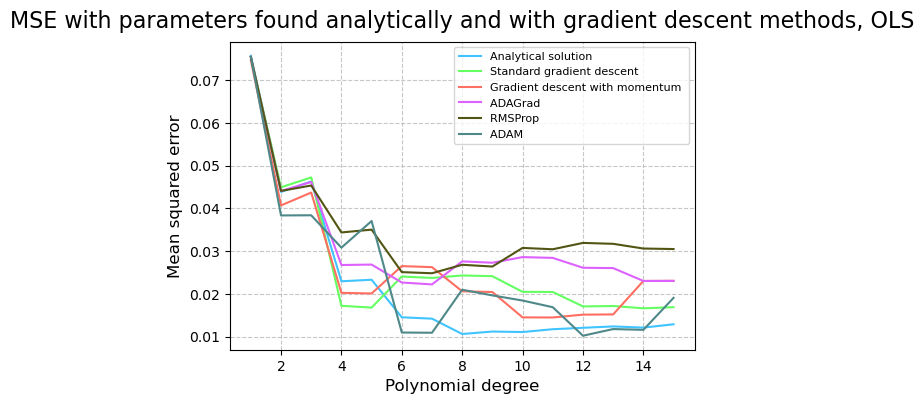

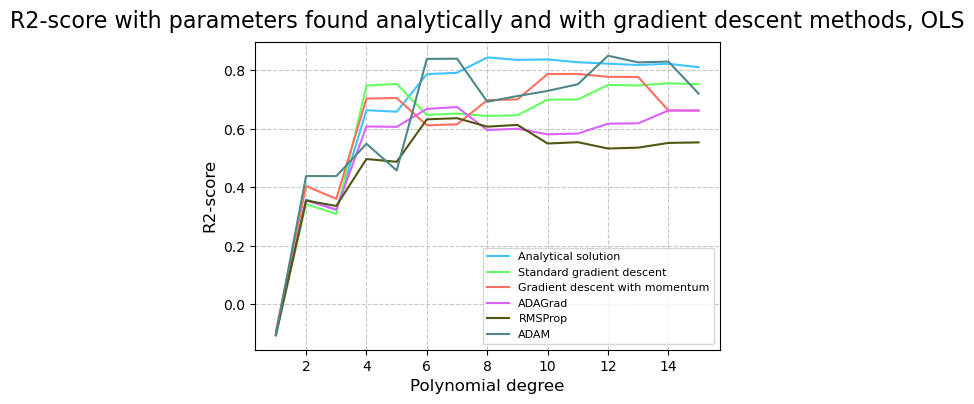

In [174]:
### Plotting results
degrees = np.arange(1, deg_max+1)

# MSE

plt.figure()
plt.plot(degrees, MSE_closed_form_OLS, label="Analytical solution", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gd_fixed_learning_rate_OLS, label="Standard gradient descent", color="#64FF61", linewidth=1.5)
plt.plot(degrees, MSE_gd_momentum_OLS, label="Gradient descent with momentum ", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAGrad_OLS, label="ADAGrad ", color="#DD61FF", linewidth=1.5)
plt.plot(degrees, MSE_gd_RMSProp_OLS, label="RMSProp ", color="#525513", linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAM_OLS, label="ADAM ", color='#4E8888', linewidth=1.5)
plt.title("MSE with parameters found analytically and with gradient descent methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/MSE_gradient_descent_methods_OLS.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_form_OLS, label="Analytical solution", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_gd_fixed_learning_rate_OLS, label="Standard gradient descent", color='#64FF61', linewidth=1.5)
plt.plot(degrees, R2_gd_momentum_OLS, label="Gradient descent with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, R2_gd_ADAGrad_OLS, label="ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(degrees, R2_gd_RMSProp_OLS, label="RMSProp", color="#525513", linewidth=1.5)
plt.plot(degrees, R2_gd_ADAM_OLS, label="ADAM", color="#4E8888", linewidth=1.5)
plt.title("R2-score with parameters found analytically and with gradient descent methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/r2_gradient_descent_methods_OLS.pdf", bbox_inches="tight")
plt.show()


## Ridge

### Testing

### Standard stochastic gradient descent

In [186]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 5
lam = 0.1
eta = 1e-3

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000, M=5)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02636866 -0.26076446  0.00108355  0.0716252   0.0068877 ]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.04582875 -0.68457157  0.09905132  0.48934076 -0.05275484]
GD parameters equal to closed-form parameters: [ True False  True False  True].
Tolerance = 0.1


### SGD with momentum

In [191]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 4
lam = 0.01
eta = 1e-3
mom = 0.9

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_momentum_Ridge(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, n_epochs=1000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-1
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02002823 -0.56368427  0.01795702  0.38650079]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.0225989  -0.70002216  0.02685685  0.50547932]
GD parameters equal to closed-form parameters: [ True  True  True  True].
Tolerance = 0.1


### SGD with ADAGrad

In [ ]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 4
lam = 0.001
eta = 1e-1


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAGrad_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.01955712 -0.67677091  0.02495445  0.48244174]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.02250734 -0.70176442  0.0268376   0.50721309]
GD parameters equal to closed-form parameters: [ True False  True False].
Tolerance = 0.01


### SGD with RMSProp

In [233]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 4
lam = 0.1
eta = 1e-3


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_RMSProp_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000, M=5)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.0180497  -0.66211728  0.02493864  0.47032964]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.02346722 -0.68313568  0.02702485  0.48867859]
GD parameters equal to closed-form parameters: [ True False  True False].
Tolerance = 0.01


### SGD with ADAM

In [246]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 4
lam = 0.001
eta = 1e-3


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = sgd_ADAM_Ridge(X_train_s, y_train, lam = lam, eta=eta, n_epochs=1000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-2
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02204751 -0.68152288  0.0218583   0.48749172]
Number of iterations: 16000
Closed-form Ridge coefficients:  [-0.02250734 -0.70176442  0.0268376   0.50721309]
GD parameters equal to closed-form parameters: [ True False  True False].
Tolerance = 0.01
